In [6]:
from qutip import *
from numpy import pi, linspace, sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
w1 = 4 * 2 * pi
#wd = (4-0.01) * 2 * pi
wd = w1 - 0.01*2*pi

kappa = 4*10**-3 * 2*pi  # was 1e-3 * 2*pi      
E = 0.02*2*pi;

wlist = linspace(-0.2* pi * 2, 0.2 * pi * 2, 2000)

# Hamiltonian
a1 = destroy(2)
H = (w1-wd)* a1.dag() * a1 + 0.5*E*(a1.dag() + a1)

In [14]:
H

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.          0.06283185]
 [ 0.06283185  0.06283185]]

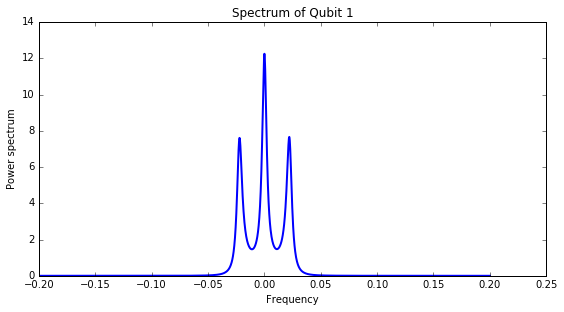

In [15]:
      
# collapse operators
c_op_list = []

#n_th_a = 0.5  # original
n_th_a = 0.001  # to make it approximately symmetric
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_op_list.append(sqrt(rate) * a1)

rate = kappa * n_th_a
if rate > 0.0:
    c_op_list.append(sqrt(rate) * a1.dag())

A1 = a1.dag()
B1 = a1

# calculate the power spectrum
spec1 = spectrum(H, wlist, c_op_list, A1, B1)

# plot results side-by-side
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(wlist / (2 * pi), abs(spec1), 'b', lw=2)
plt.xlabel('Frequency')
plt.ylabel('Power spectrum')
plt.title('Spectrum of Qubit 1')